<a href="https://colab.research.google.com/github/Guadalescano/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Clasificación de Agua Potable</h1>
<h2>🚰El objetivo de este proyecto es predecir si una muestra de agua es potable basándonos en características físico-químicas y ambientales.</h2>

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/micaelakorol21/dataset_water_quality/refs/heads/main/Water_quality.csv')

<p style="font-size:20px;">🔍Exploración de los datos:</p>

In [3]:
df.shape
# El dataset poseé: 24 columnas y 698.575 filas.

(698575, 24)

In [4]:
# Tipos de datos de cada columna:
df.dtypes

,0
Index,int64
pH,float64
Iron,float64
Nitrate,float64
Chloride,float64
Lead,float64
Zinc,float64
Color,object
Turbidity,float64
Fluoride,float64


In [5]:
# Columnas que tienen datos faltantes
df.isna().sum()

,0
Index,0
pH,13438
Iron,4684
Nitrate,12430
Chloride,20467
Lead,3107
Zinc,18498
Color,660
Turbidity,5798
Fluoride,21996


In [6]:
max_missing = df.isna().sum().max()  # Calculo el maximo valor faltante
print(f"El valor maximo de faltantes es de {max_missing}")

El valor maximo de faltantes es de 23291


<b style='font-size:22px'>Renombramos las columnas</b>

In [7]:
df = df.rename(columns={
    'Index': 'Índice',
    'pH': 'pH',
    'Iron': 'Plata',
    'Nitrate': 'Nitrato',
    'Chloride': 'Cloruros',
    'Lead': 'Plomo',
    'Zinc': 'Zinc',
    'Color': 'Color',
    'Turbidity': 'Turbidez',
    'Fluoride': 'Fluoruro',
    'Copper': 'Cobre',
    'Odor': 'Olor',
    'Sulfate': 'Sulfatos',
    'Conductivity': 'Conductividad',
    'Chlorine': 'Cloro residual libre',
    'Manganese': 'Manganeso',
    'Total Dissolved Solids': 'Sólidos disueltos totales',
    'Source': 'Fuente',
    'Water Temperature': 'Temperatura del agua',
    'Air Temperature': 'Temperatura del aire',
    'Month': 'Mes',
    'Day': 'Día',
    'Time of Day': 'Hora del día',
    'Target': 'Objetivo'
})

<b style="font-size:16px">El conjunto de datos incluye 24 columnas, de las cuales 23 son variables predictoras y 1 es la variable objetivo que indica si el agua <b style='color:red'> es potable (1) o no (0)  </b> .</b>

In [8]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:22px;"> Análisis de la variable objetivo: Objetivo</b>

In [9]:
# Conteo de clases
df['Objetivo'].value_counts()

,count
Objetivo,
0,457841
1,240734


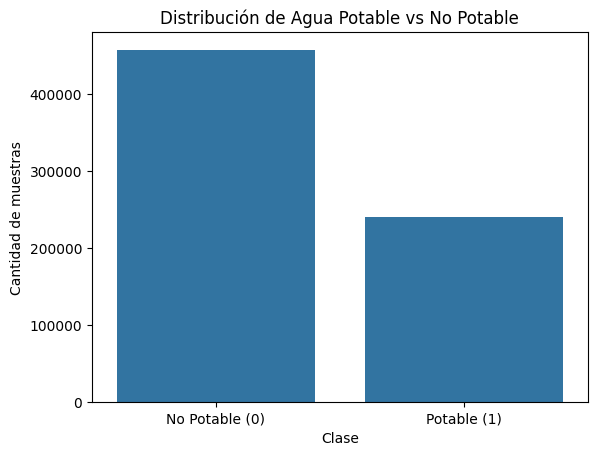

In [10]:
sns.countplot(data=df, x='Objetivo')
plt.title('Distribución de Agua Potable vs No Potable')
plt.xticks([0, 1], ['No Potable (0)', 'Potable (1)'])
plt.ylabel('Cantidad de muestras')
plt.xlabel('Clase')
plt.show()

<b style='font-size:16px'>El dataset está desbalanceado: hay más muestras de agua no potable (457841) que de agua potable (240734).</b>

<b style="font-size:22px">Limpieza de los datos de la columna pH </b>

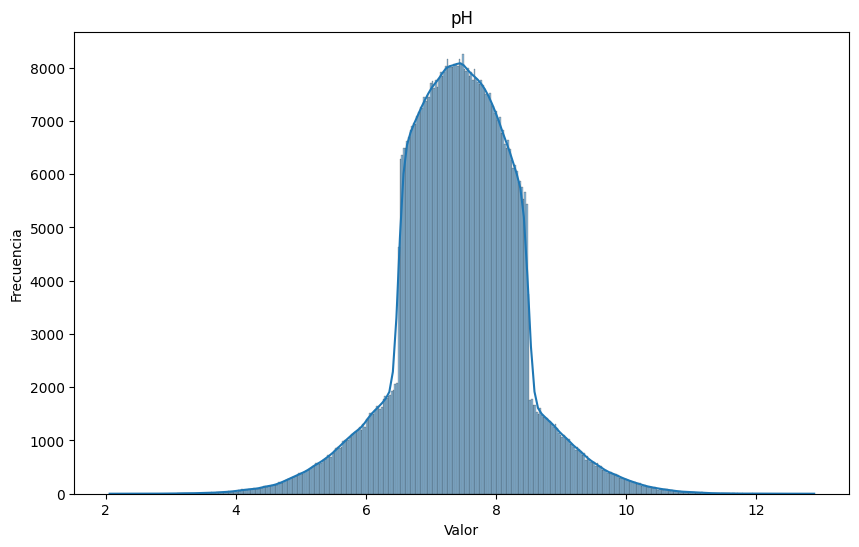

In [11]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
df['pH'].describe()

,pH
count,685137.000000
mean,7.442448
std,0.911493
min,2.058008
25%,6.880107
50%,7.447080
75%,8.023730
max,12.891960


In [13]:
#Eliminar outliers de la fila pH

col = 'pH'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
# eliminando las filas que contienen valores en la columna pH que están fuera del rango definido
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
df['pH'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['pH'].describe()

,pH
count,667067.000000
mean,7.449839
std,0.803099
min,5.164678
25%,6.899036
50%,7.450028
75%,8.010550
max,9.739132


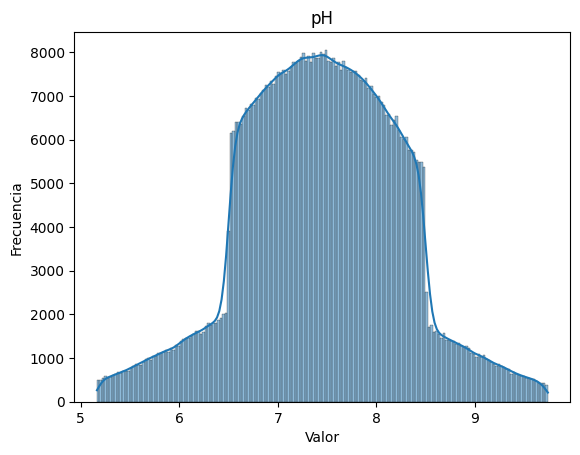

In [14]:
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show() # ¿no es mejor usar z score?

<p>Análisis de pH 📝 Después de eliminar los valores nulos y los outliers en la columna pH, se observaron variaciones significativas en las estadísticas descriptivas. Se eliminaron aproximadamente 29,870 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, hubo un ligero aumento, pasando de 7.45 a 7.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por debajo del promedio general. La desviación estándar también se redujo notablemente de 0.85 a 0.73, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo cambió de 2.06 a 5.36 y el máximo de 12.89 a 9.57, lo que confirma que se eliminaron los valores más extremos en ambos extremos del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable</p>

In [15]:
df.isna().sum()

,0
Índice,0
pH,0
Plata,4463
Nitrato,11923
Cloruros,19596
Plomo,2973
Zinc,17623
Color,627
Turbidez,5573
Fluoruro,21014


<b style="font-size:22px">Limpieza de los datos de la columna Plata </b>

In [16]:
df['Plata'].describe()

,Plata
count,6.626040e+05
mean,1.320244e-01
std,4.859343e-01
min,8.010000e-45
25%,1.010000e-05
50%,2.325443e-03
75%,5.635290e-02
max,1.574860e+01


In [17]:
col_p = 'Plata'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    5.562300e+05
mean     1.553449e-02
std      3.011400e-02
min      8.010000e-45
25%      2.530000e-06
50%      5.901445e-04
75%      1.409545e-02
max      1.408669e-01
Name: Plata, dtype: float64


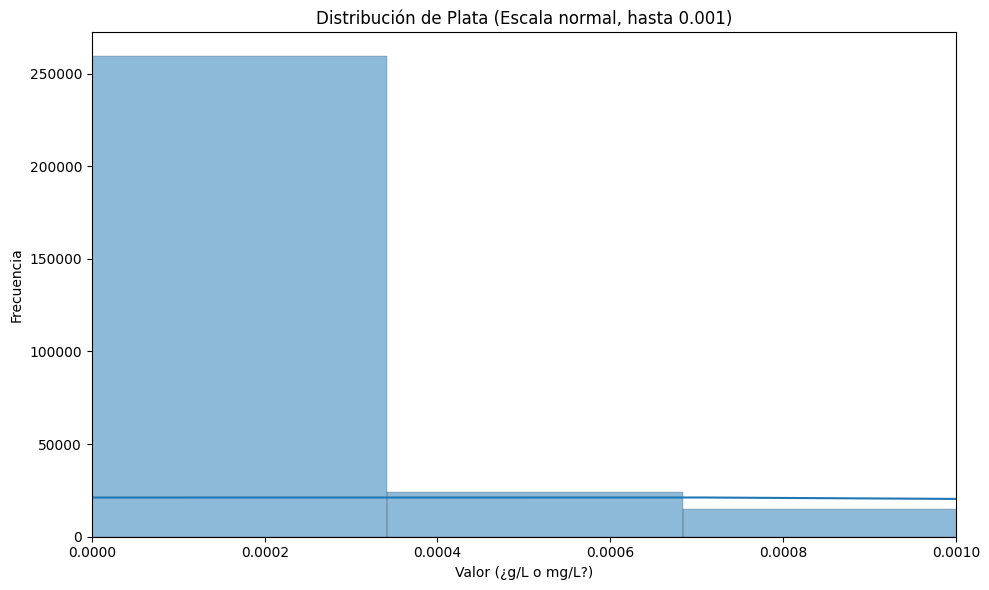

In [18]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normal acotado hasta 0.001
sns.histplot(df['Plata'], kde=True, ax=ax)

# Acotar eje X para observar mejor valores pequeños
ax.set_xlim(0, 0.001)

# Agregar títulos y etiquetas
ax.set_title('Distribución de Plata (Escala normal, hasta 0.001)')
ax.set_xlabel('Valor (¿g/L o mg/L?)')  # Cambiar al confirmar la unidad
ax.set_ylabel('Frecuencia')

# Ajustar presentación
plt.tight_layout()
plt.show()

<b style="font-size:22px">Limpieza de los datos de la columna Plomo </b>

In [19]:
#df['Plomo'].head(30)
#ver si tiene datos nulos.........................

<b style="font-size:22px">Limpieza de los datos de la columna Nitrato </b>

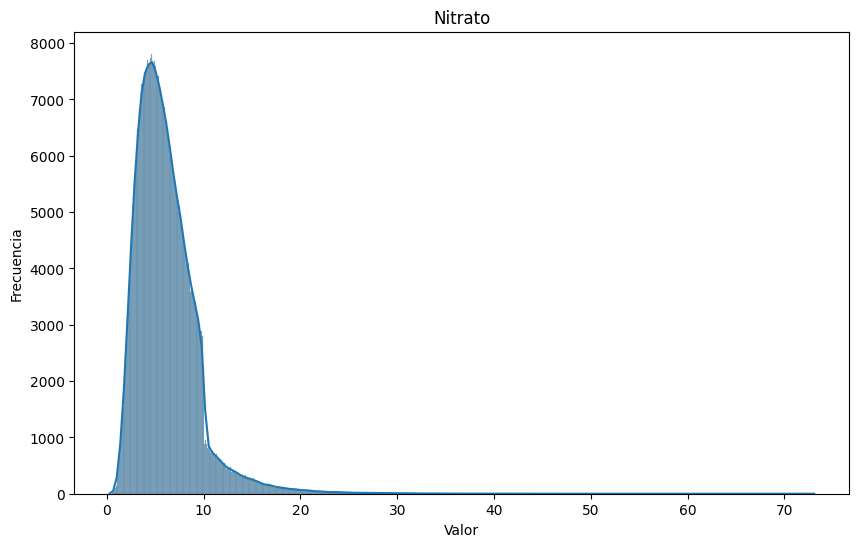

In [20]:
# Observamos la distribuición de la columna Nitrato:
plt.figure(figsize=(10, 6))
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
df['Nitrato'].describe()

,Nitrato
count,546223.000000
mean,6.136038
std,3.215009
min,0.286173
25%,3.966220
50%,5.595346
75%,7.636367
max,73.072931


In [22]:
#Eliminar outliers de la fila Nitrato

col2 = 'Nitrato'  # ejemplo
Q1 = df[col2].quantile(0.25)
Q3 = df[col2].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col2] >= Q1 - 1.5 * IQR) & (df[col2] <= Q3 + 1.5 * IQR)]
df['Nitrato'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Nitrato'].describe()

,Nitrato
count,528853.000000
mean,5.767487
std,2.383792
min,0.286173
25%,3.913698
50%,5.485218
75%,7.403927
max,13.141506


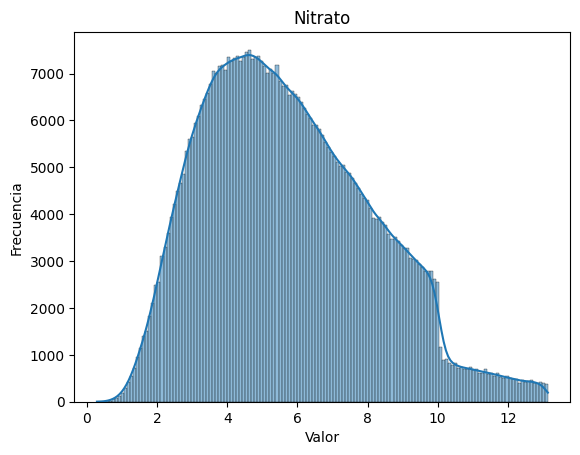

In [23]:
plt.figure()
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Nitrato 📝 Después de eliminar los valores nulos y los outliers, se eliminaron aproximadamente 17,370 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 6.13 a 5.76, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 3.21 a 2.28, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 73.07 a 13.14, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 45 mg/l, hay que evaluar que unidad maneja el dataset para coincidir con el promedio aprox.</p>

<b style="font-size:22px">Limpieza de los datos de la columna Cloruros</b>

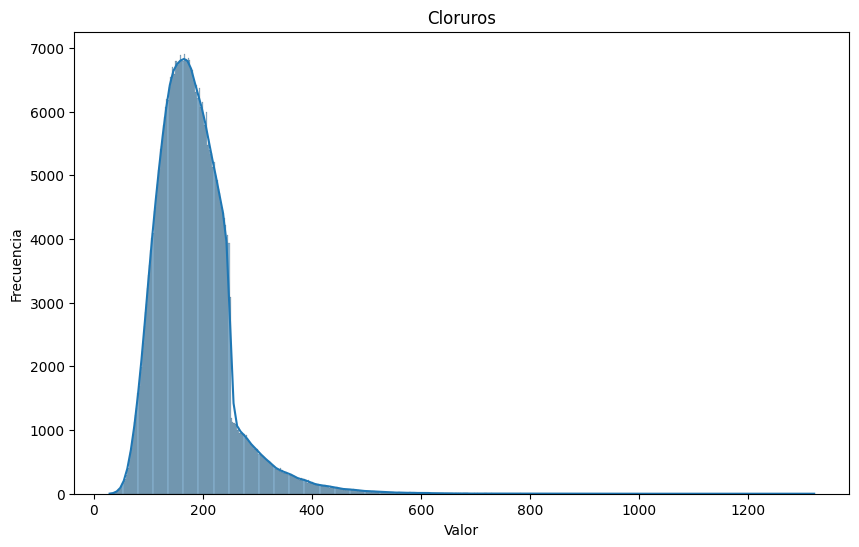

In [24]:
# Observamos la distribuición de la columna Cloruros:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [25]:
df['Cloruros'].describe()

,Cloruros
count,513336.000000
mean,182.680492
std,66.684631
min,29.413497
25%,137.754491
50%,175.145528
75%,216.356432
max,1321.276280


In [26]:
#Eliminar outliers de la fila Cloruros

col3 = 'Cloruros'  # ejemplo
Q1 = df[col3].quantile(0.25)
Q3 = df[col3].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col3] >= Q1 - 1.5 * IQR) & (df[col3] <= Q3 + 1.5 * IQR)]
df['Cloruros'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Cloruros'].describe()

,Cloruros
count,497619.000000
mean,175.570696
std,52.556628
min,29.413497
25%,136.522537
50%,172.881639
75%,212.068579
max,334.247076


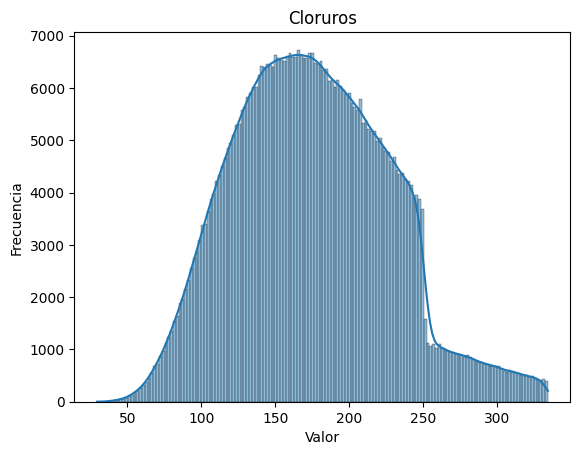

In [27]:
plt.figure()
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Cloruros 📝 Después de eliminar los valores nulos y los outliers, se eliminaron 15,717 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 182.68 a 175.57, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 66.58 a 52.55, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 1321 a 334, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 200 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b style="font-size:22px">Limpieza de los datos de la columna Plomo, Zinc, Manganeso APLICARLES LOGARITMOS</b>

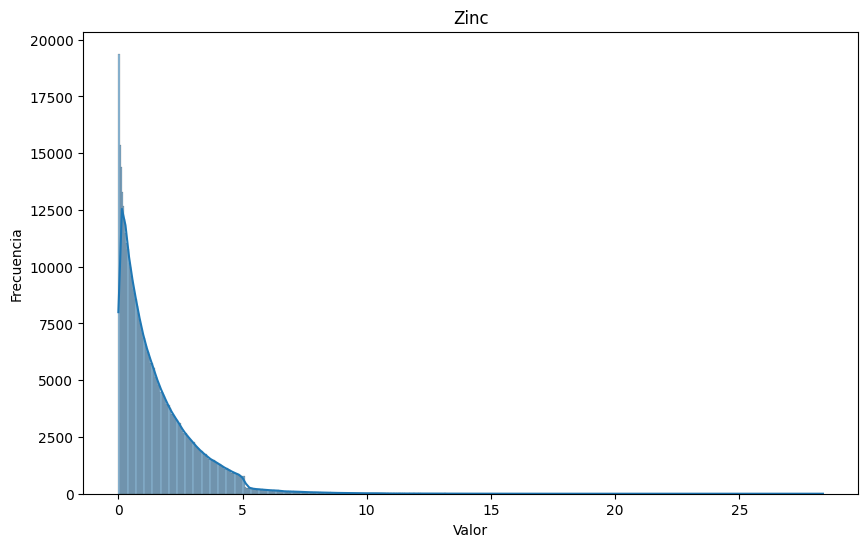

In [28]:
# Observamos la distribuición de la columna Zinc:
plt.figure(figsize=(10, 6))
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
df['Zinc'].describe()

,Zinc
count,484563.000000
mean,1.531481
std,1.505043
min,0.000001
25%,0.415094
50%,1.078573
75%,2.217501
max,28.368672


In [30]:
#Eliminar outliers de la fila Zinc

col5 = 'Zinc'  # ejemplo
Q1 = df[col5].quantile(0.25)
Q3 = df[col5].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col5] >= Q1 - 2.5 * IQR) & (df[col5] <= Q3 + 2.5 * IQR)]
df['Zinc'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Zinc'].describe()

,Zinc
count,479969.000000
mean,1.463140
std,1.325814
min,0.000001
25%,0.409845
50%,1.062825
75%,2.172168
max,6.722317


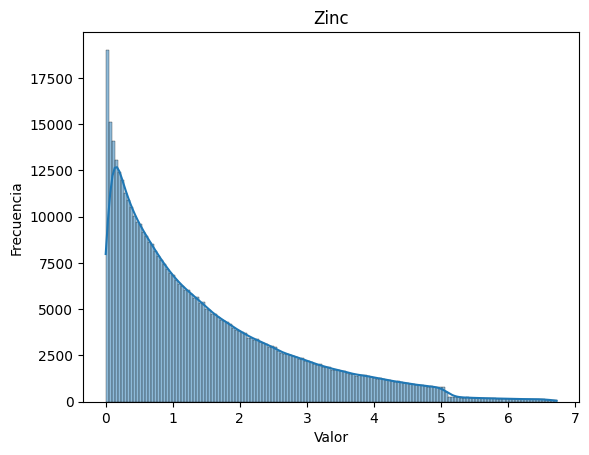

In [31]:
#Volvemos a graficar
plt.figure()
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Zinc 📝 Después de eliminar los valores nulos y los outliers, se eliminaron solo 4,594 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 1.53 a 1.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 1.50 a 1.42, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 28.36 a 6.72, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 5 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b> Limpieza de los datos de la columna Plomo, Manganeso : </b>

In [32]:
df['Plomo'].describe()

,Plomo
count,4.777910e+05
mean,1.292366e-03
std,3.047505e-02
min,0.000000e+00
25%,9.495000e-123
50%,1.340000e-62
75%,2.920000e-27
max,3.251502e+00


In [33]:
df['Manganeso'].describe()

,Manganeso
count,4.711490e+05
mean,9.102037e-02
std,4.326407e-01
min,1.380000e-46
25%,2.020000e-06
50%,5.215080e-04
75%,1.321098e-02
max,1.526468e+01


ValueError: Maximum allowed size exceeded

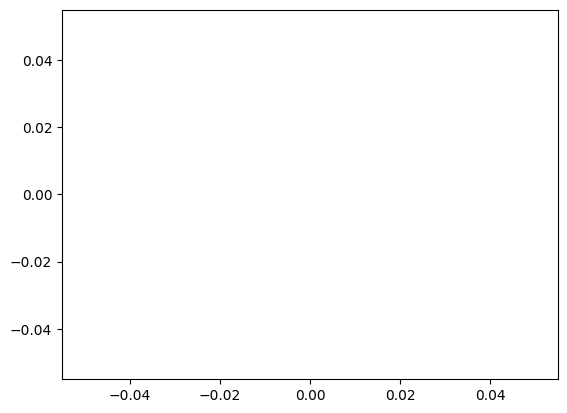

In [34]:
plt.figure()
sns.histplot(df['Plomo'], kde=True)
plt.title('Plomo')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<h2 style='color:red'> Temperatura del agua / aire ------- Pendiente (Micaela) </h2>
# Aplicarle IQL y graficar nuevamente.

<h2 style='color:red'> Columna Manganeso pendiente (Micaela) </h2>
##################### df['Manganeso'].describe() - pendiente

In [35]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:22px">Análisis de columnas: Turbidez, Fluoruro, Cobre, Olor, Sulfatos</b>

In [36]:
columnas = ['Turbidez','Fluoruro', 'Cobre','Olor','Sulfatos']

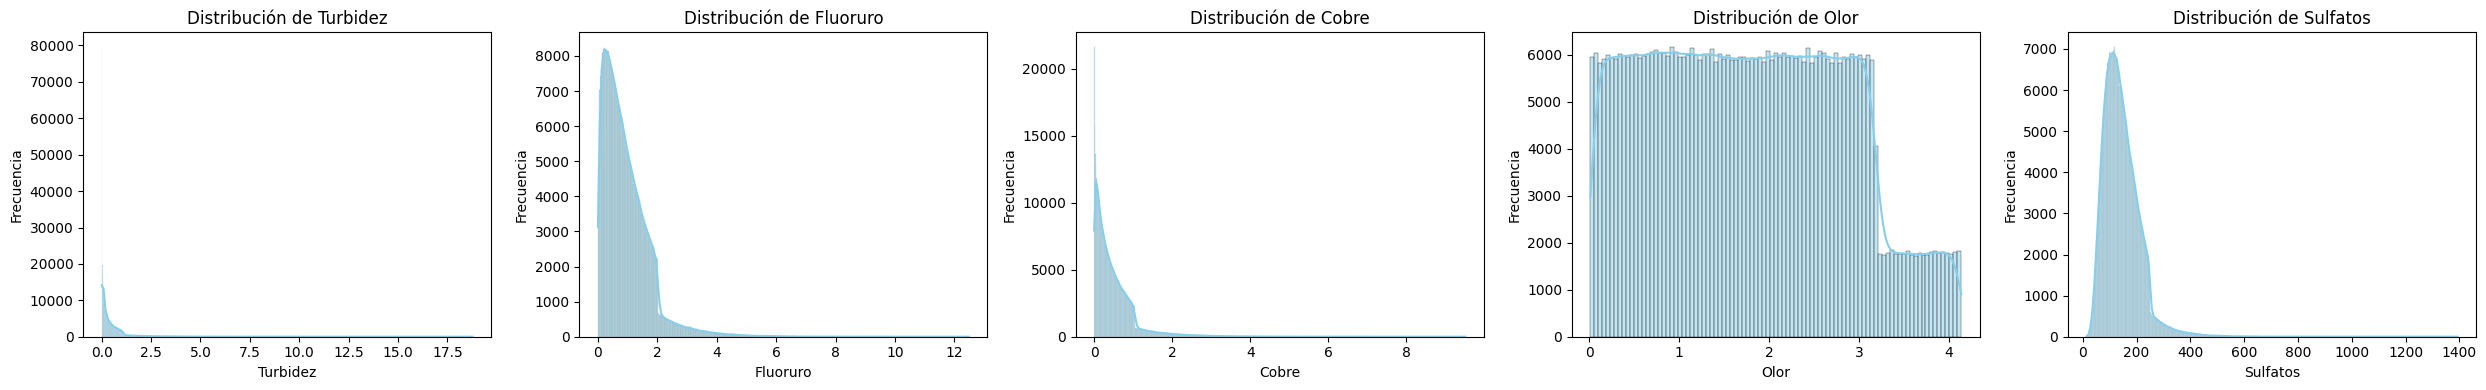

In [37]:
#Gráfico:
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [38]:
# Aplicamos IQR
cols = ['Turbidez','Fluoruro', 'Cobre','Olor','Sulfatos']  # Selecciona las columnas a analizar
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

In [39]:
df.isna().sum()

,0
Índice,0
pH,0
Plata,0
Nitrato,0
Cloruros,0
Plomo,1610
Zinc,0
Color,328
Turbidez,0
Fluoruro,0


<h1>CONCLUSIÓN:</h1>



<b style="font-size:22px">Análisis de columnas: Conductividad, Cloro residual libre, Sólidos disueltos totales</b>

In [40]:
columnas2 = ['Conductividad','Cloro residual libre','Sólidos disueltos totales']

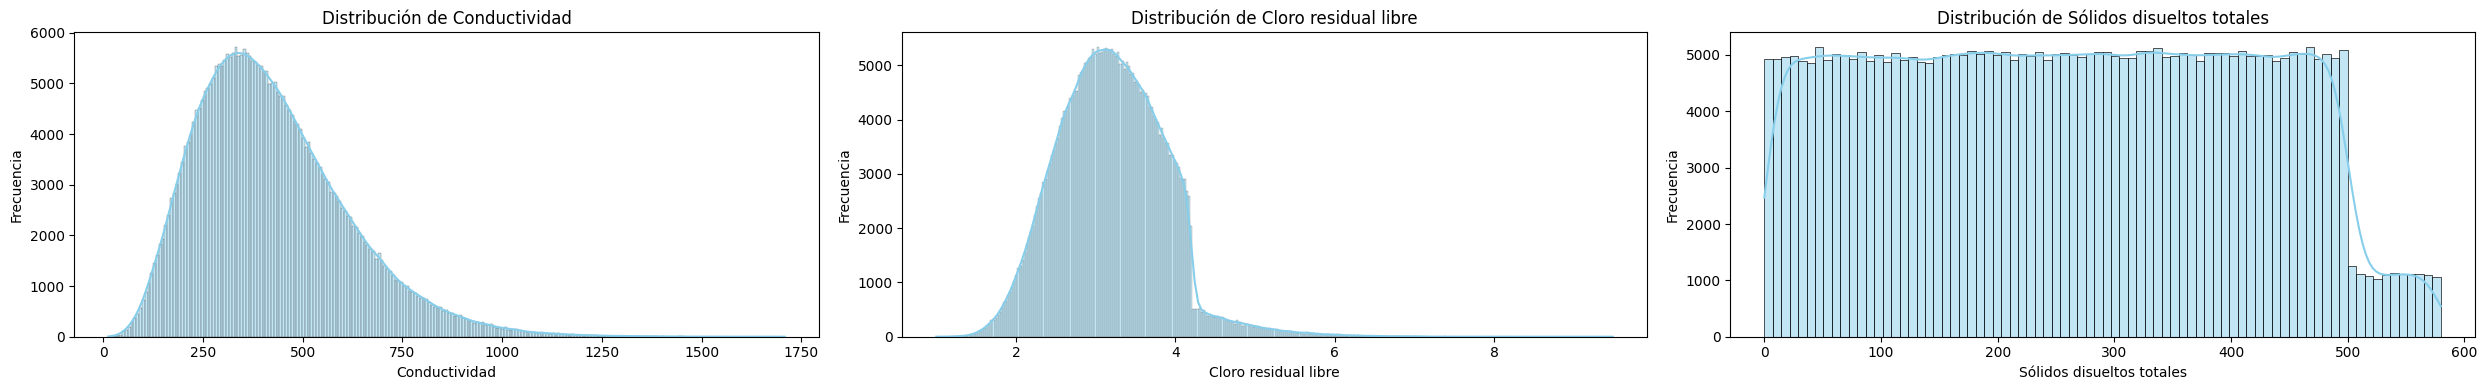

In [41]:
#Gráficamos
fig, axes = plt.subplots(1, len(columnas2), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas2):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [42]:
#IQR
cols2 = ['Conductividad', 'Cloro residual libre', 'Sólidos disueltos totales']  # Selecciona las columnas a analizar
for col in cols2:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

<h1>CONCLUSIÓN:</h1>

### <b style="font-size:30px">Análisis de columna: Temperatura del agua </b>

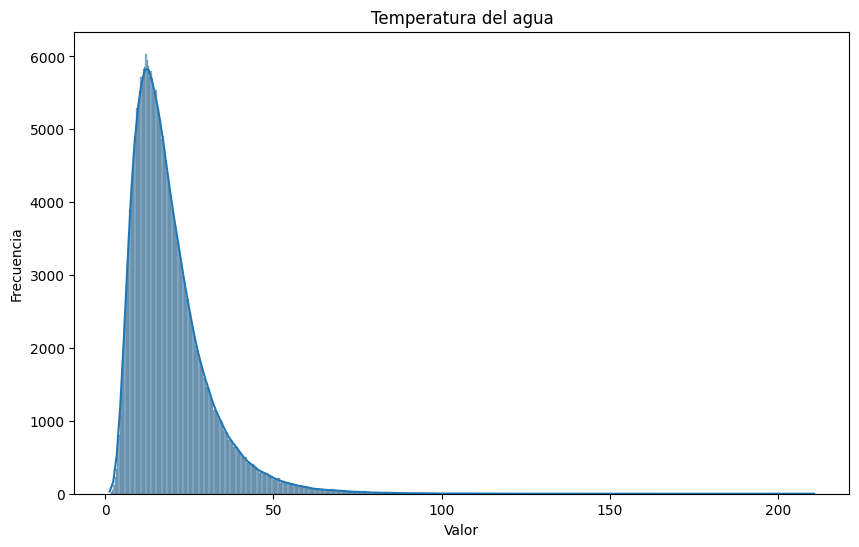

In [76]:
# Observamos la distribuición de la columna Temp. del Agua:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperatura del agua'], kde=True)
plt.title('Temperatura del agua')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [78]:
df['Temperatura del agua'].describe()

,Temperatura del agua
count,313100.000000
mean,19.128625
std,11.354656
min,1.274254
25%,11.361189
50%,16.468708
75%,23.821399
max,210.821909


In [79]:
#Eliminar outliers

col9 = 'Temperatura del agua'  # ejemplo
Q1 = df[col9].quantile(0.25)
Q3 = df[col9].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col9] >= Q1 - 1.5 * IQR) & (df[col9] <= Q3 + 1.5 * IQR)]
df['Temperatura del agua'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Temperatura del agua'].describe()

,Temperatura del agua
count,299928.000000
mean,17.583994
std,8.403177
min,1.274254
25%,11.151737
50%,15.994672
75%,22.614966
max,42.511393


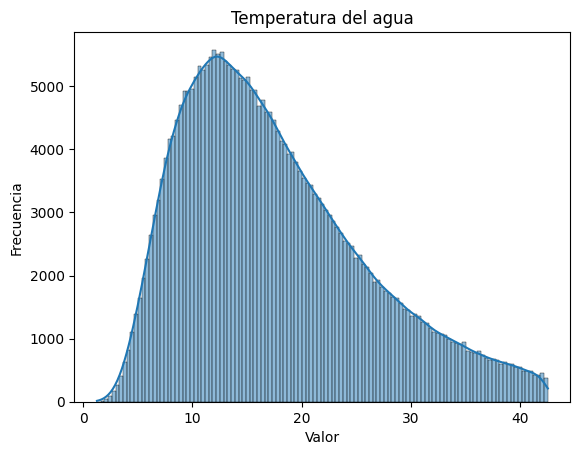

In [80]:
# Volvemos a graficar
plt.figure()
sns.histplot(df['Temperatura del agua'], kde=True)
plt.title('Temperatura del agua')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

Después de eliminar los valores nulos y los outliers, los datos de las temperaturas muestran una reducción en la cantidad de registros, con una disminución tanto en la media como en la desviación estándar. La temperatura del agua experimentó una baja en la media, pasando de 19.13 a 17.58, lo que indica que los valores extremos estaban influyendo en el promedio. También se observó una notable reducción en el valor máximo, que bajó de 210.82 a 42.51, reflejando la eliminación de outliers muy altos.

### <b style="font-size:30px">Análisis de columna: Temperatura del aire </b>

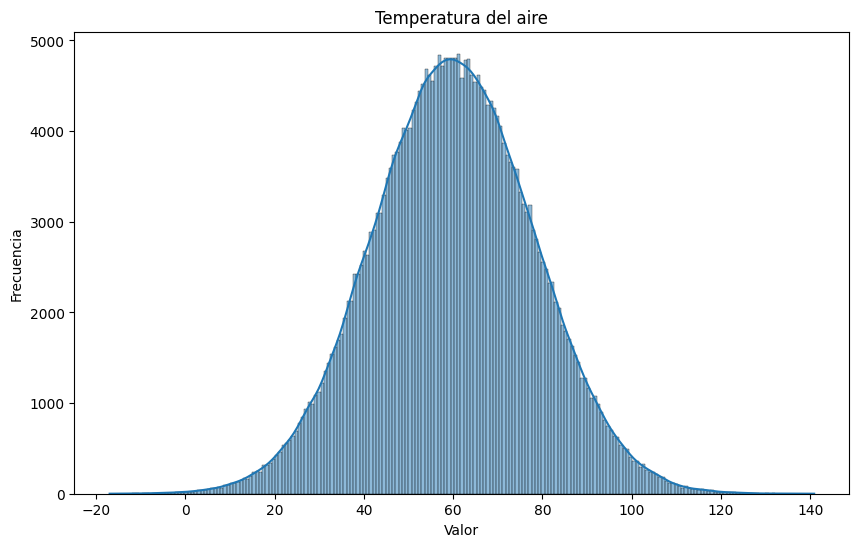

In [81]:
# Observamos la distribuición de la columna Temp. del Aire:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperatura del aire'], kde=True)
plt.title('Temperatura del aire')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [82]:
df['Temperatura del aire'].describe()

,Temperatura del aire
count,298376.000000
mean,60.041315
std,18.039909
min,-16.991612
25%,47.855747
50%,59.986955
75%,72.194509
max,140.875607


In [83]:
#Eliminar outliers

col10 = 'Temperatura del aire'  # ejemplo
Q1 = df[col10].quantile(0.25)
Q3 = df[col10].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col10] >= Q1 - 1.5 * IQR) & (df[col10] <= Q3 + 1.5 * IQR)]
df['Temperatura del aire'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Temperatura del aire'].describe()

,Temperatura del aire
count,296240.000000
mean,60.043437
std,17.502541
min,11.347955
25%,47.962959
50%,59.988227
75%,72.095179
max,108.698861


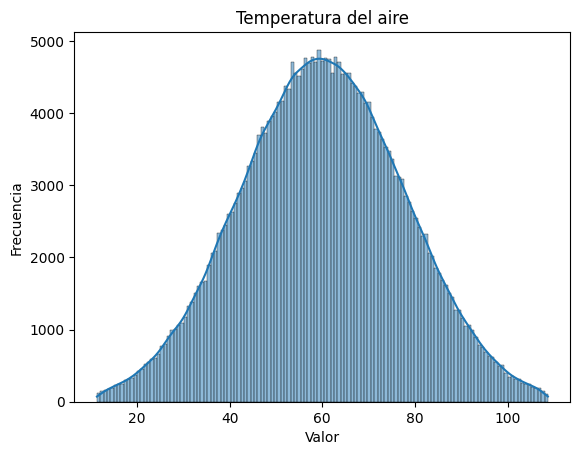

In [84]:
# Volvemos a graficar
plt.figure()
sns.histplot(df['Temperatura del aire'], kde=True)
plt.title('Temperatura del aire')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

En cuanto a la temperatura del aire, la media prácticamente se mantuvo igual, pero el máximo también disminuyó de 140.88 a 108.70, sugiriendo que los valores extremos fueron eliminados.

# Variables categoricas 📊

### <b style="font-size:30px">Análisis de columnas: Meses </b>

In [59]:
print(df['Mes'].unique())
total_meses = df['Mes'].count()
print("Total de registros con Mes válido:", total_meses)


['April', 'March', 'May', 'January', 'July', ..., 'September', 'August', 'June', 'December', 'February']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' <
                          'November' < 'December']
Total de registros con Mes válido: 327044


In [60]:
# Elimino los valores nulos
df = df[df['Mes'].notna()]
# Ordeno los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

<ipython-input-61-3c32e8ff666a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_meses.index, y=conteo_meses.values, palette="viridis")


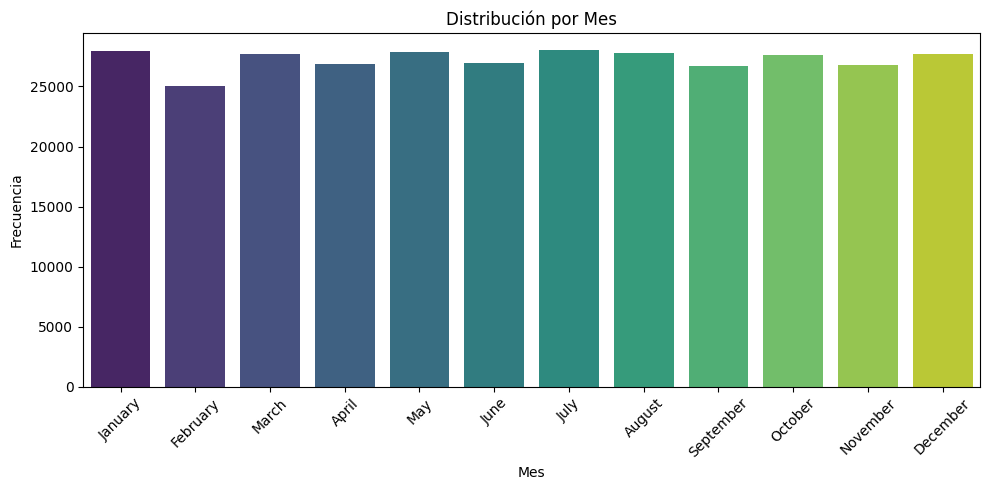

In [61]:
conteo_meses = df['Mes'].value_counts().reindex(orden_meses)
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_meses.index, y=conteo_meses.values, palette="viridis")
plt.title("Distribución por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b style="font-size:22px"> Convertimos las variables categóricas en formato numérico para poder usarlas en modelos. (Encoding)
Se aplica Label Encoding con orden cronológico ya que este es útil para conservar el orden de los meses y usarlo en modelos que consideren relaciones ordinales </b>

In [62]:
#Este código toma la columna categórica 'Mes', define un orden específico para los meses y luego crea una nueva columna numérica
#'Mes_encoded' que representa los meses con números basados en ese orden. Esto prepara los datos para su uso en modelos de aprendizaje
# automático que requieren entrada numérica.

df['Mes'] = pd.Categorical(df['Mes'], categories=orden_meses, ordered=True)
df['Mes_encoded'] = df['Mes'].cat.codes

df[['Mes', 'Mes_encoded']].head()

,Mes,Mes_encoded
2,April,3
3,March,2
5,May,4
7,May,4
9,January,0


### <b style="font-size:30px">Análisis de columna: Color </b>

In [55]:
print(df['Color'].unique())
total_meses = df['Color'].count()
print("Total de registros con Mes válido:", total_meses)

['Colorless' 'Yellow' 'Near Colorless' 'Light Yellow' 'Faint Yellow' nan]
Total de registros con Mes válido: 327044


In [56]:
# Elimino los valores nulos
df = df[df['Color'].notna()]
# Este orden sigue la escala estándar de color del agua tipo Pt-Co (Platinum-Cobalt), donde un número bajo indica agua más clara.
orden_color = ['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow', 'Yellow']

La variable Color representa la apariencia visual del agua y puede estar relacionada con la presencia de contaminantes orgánicos o inorgánicos. Dado que estas categorías tienen una progresión lógica (desde "Colorless" hasta "Yellow"), se convierte a una variable categórica ordinal con el siguiente orden:

'Colorless' < 'Near Colorless' < 'Faint Yellow' < 'Light Yellow' < 'Yellow'. Este orden refleja un aumento en la intensidad del color, útil para modelos que aprovechan relaciones ordinales.

<ipython-input-57-da28407b9392>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_color.index, y=conteo_color.values, palette="viridis")


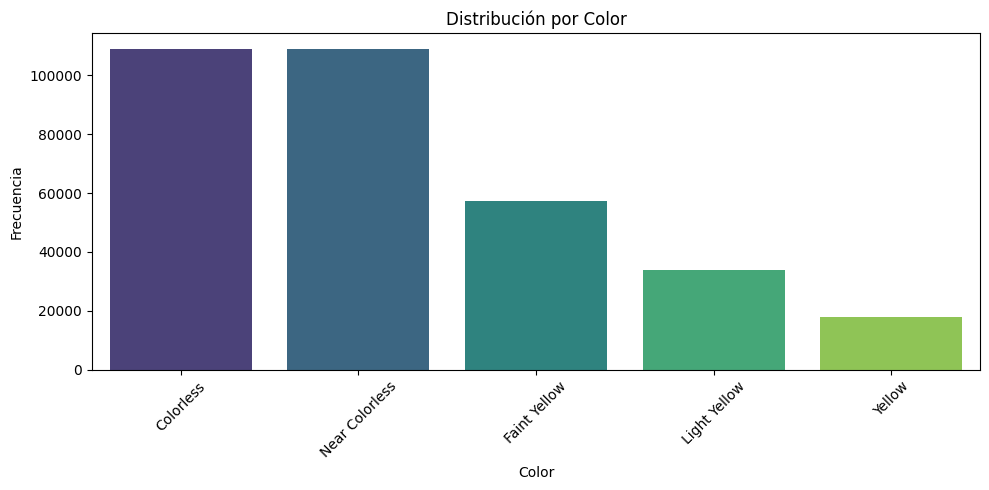

In [57]:
conteo_color = df['Color'].value_counts().reindex(orden_color)
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_color.index, y=conteo_color.values, palette="viridis")
plt.title("Distribución por Color")
plt.xlabel("Color")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b style="font-size:22px"> Convertimos las variables categóricas en formato numérico para poder usarlas en modelos. (Encoding) Se aplica Label Encoding con orden cronológico ya que este es útil para conservar el orden de los meses y usarlo en modelos que consideren relaciones ordinales <b

In [58]:
# Este código convierte la columna categórica 'Color' en una variable ordinal,
# definiendo un orden lógico basado en la intensidad del color del agua,
# desde 'Colorless' (agua más clara) hasta 'Yellow' (más intensa).
# Luego, se crea una nueva columna 'Color_encoded' con valores numéricos (0 a 4)
# que permiten utilizar esta variable en modelos de aprendizaje automático que requieren datos numéricos.
df['Color'] = pd.Categorical(df['Color'], categories=orden_color, ordered=True)
df['Color_encoded'] = df['Color'].cat.codes

df[['Color', 'Color_encoded']].head()

,Color,Color_encoded
2,Colorless,0
3,Colorless,0
5,Colorless,0
7,Yellow,4
9,Near Colorless,1


La variable Color representa la apariencia visual del agua y puede estar relacionada con la presencia de contaminantes orgánicos o inorgánicos. Dado que estas categorías tienen una progresión lógica (desde "Colorless" hasta "Yellow"), se convierte a una variable categórica ordinal con el siguiente orden:

'Colorless' < 'Near Colorless' < 'Faint Yellow' < 'Light Yellow' < 'Yellow'.
Este orden refleja un aumento en la intensidad del color, útil para modelos que aprovechan relaciones ordinales.

### <b style="font-size:30px">Análisis de columna: Fuente </b>

In [63]:
print(df['Fuente'].unique())
total_fuentes = df['Fuente'].count()
print("Total de registros con Fuente son:", total_fuentes)

['Reservoir' 'Spring' 'River' 'Stream' nan 'Ground' 'Aquifer' 'Lake'
 'Well']
Total de registros con Fuente son: 322209


In [64]:
# Elimino los valores nulos
df = df[df['Fuente'].notna()]

<ipython-input-65-9d4b87e62e28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_fuentes.index, y=conteo_fuentes.values, palette="viridis")


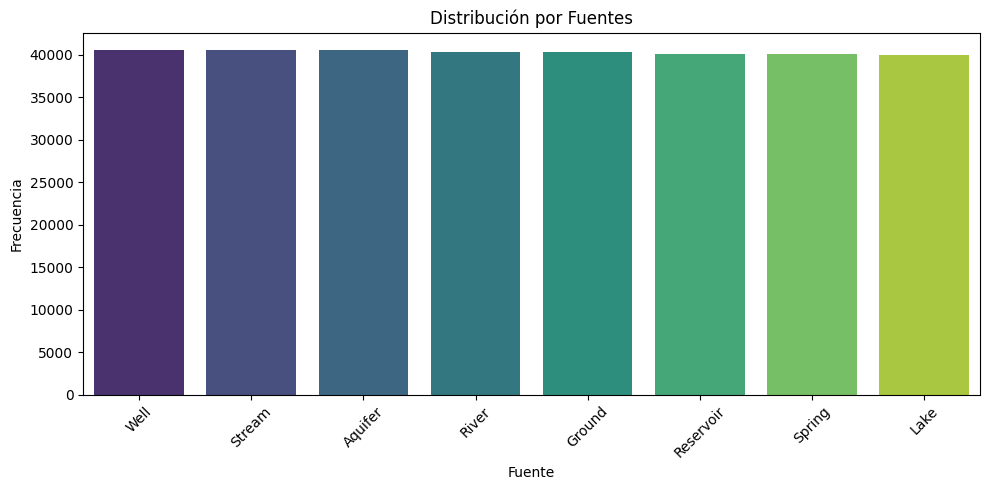

In [65]:
conteo_fuentes = df['Fuente'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_fuentes.index, y=conteo_fuentes.values, palette="viridis")
plt.title("Distribución por Fuentes")
plt.xlabel("Fuente")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
# En el gráfico se visualizan casi iguales, confirmo con esto
conteo_fuentes = df['Fuente'].value_counts()
print(conteo_fuentes)
# Hay diferencias entre estos por lo tanto mantengo las Fuentes

Fuente
Well         40544
Stream       40520
Aquifer      40499
River        40304
Ground       40286
Reservoir    40058
Spring       40044
Lake         39954
Name: count, dtype: int64


In [70]:
# La variable 'Fuente' representa la procedencia del agua (ej. río, pozo, lago, etc.).
# Dado que estas categorías no tienen un orden lógico intrínseco, se consideran variables categóricas nominales.
# Para su uso en modelos de machine learning, se recomienda aplicar One-Hot Encoding.
df_fuente_encoded = pd.get_dummies(df['Fuente'], prefix='Fuente')
df = pd.concat([df, df_fuente_encoded], axis=1)

In [71]:
# Veo si estan todas las columnas
print(df.columns[df.columns.str.startswith('Fuente_')])

Index(['Fuente_Aquifer', 'Fuente_Ground', 'Fuente_Lake', 'Fuente_Reservoir',
       'Fuente_River', 'Fuente_Spring', 'Fuente_Stream', 'Fuente_Well'],
      dtype='object')


In [72]:
# Verifico que el encoding esté bien hecho : Coincide con el valor original de Fuente.

df[['Fuente', 'Fuente_Reservoir', 'Fuente_Spring', 'Fuente_River', 'Fuente_Stream',
    'Fuente_Aquifer', 'Fuente_Lake', 'Fuente_Ground', 'Fuente_Well']].head(10)

,Fuente,Fuente_Reservoir,Fuente_Spring,Fuente_River,Fuente_Stream,Fuente_Aquifer,Fuente_Lake,Fuente_Ground,Fuente_Well
2,Reservoir,True,False,False,False,False,False,False,False
3,Spring,False,True,False,False,False,False,False,False
5,River,False,False,True,False,False,False,False,False
7,Stream,False,False,False,True,False,False,False,False
9,Spring,False,True,False,False,False,False,False,False
14,Spring,False,True,False,False,False,False,False,False
34,Stream,False,False,False,True,False,False,False,False
47,Stream,False,False,False,True,False,False,False,False
53,Reservoir,True,False,False,False,False,False,False,False
57,Reservoir,True,False,False,False,False,False,False,False


In [75]:
# Chequeo la suma total : da OK al original
print(df[['Fuente_Reservoir', 'Fuente_Spring', 'Fuente_River', 'Fuente_Stream',
          'Fuente_Aquifer', 'Fuente_Lake', 'Fuente_Ground', 'Fuente_Well']].sum())

Fuente_Reservoir    40058
Fuente_Spring       40044
Fuente_River        40304
Fuente_Stream       40520
Fuente_Aquifer      40499
Fuente_Lake         39954
Fuente_Ground       40286
Fuente_Well         40544
dtype: int64
